# TPIR Showcase Showdown Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

sys.path.append(os.pardir)

In [3]:
from src.functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

I want in this notebook to calculate the odds for various scenarios involving the "Showcase Showdown" on the game show *The Price Is Right*.

## Showcase Showdown Structure

The game works like this:

Each of three players spins a wheel with the goal of getting as close as possible to \\$1.00 without going over. A player who goes over \\$1.00 is out. If the first two players both go over \\$1.00, the third player wins automatically but still gets one spin to try to spin \\$1.00 (see below).

In the event of a tie, each of the tied players gets one spin to determine a winner.

The wheel has twenty spaces for each nickel increment between \\$0.05 and \\$1.00 (inclusive), and each player may spin once or twice, the value of the second spin being added to that of the first.

If after only one spin the current player has an amount below the current leader's amount, the current player must spin again.

There is also a bonus for reaching \\$1.00 exactly, so sometimes the third player will, even after getting an amount above the leader, spin again in an attempt to get \\$1.00.

## Defining Our Problem

With this setup there are questions of strategy. Suppose you are spinning first and you spin \\$0.60. You have a 60\% chance of going over, but that of course does not prove that you shouldn't proceed. The answer to this question depends equally on what your chances of winning are *if you stay on \\$0.60*. And this will require some calculation.

In fact, Player 1's optimal strategy will depend on Player 2's strategy, so let's start by trying to find the optimal strategy for Player 2. On which values should Player 2 stand, and on which values should Player 2 spin again?

Assuming that Player 1 is irrelevant (because of going over \\$1.00 or because of Player 2 surpassing Player 1's score on one spin), we'll prove here that Player 2 should spin again with \\$0.50 (or anything less) but stand on \\$0.55 (or anything more).

Note: When writing out equations we'll generally "divide by five" and think of a wheel with numbers from 1 to 20, instead of 5, 10, ..., 95, 100, for the sake of a more natural notation.

## Quick Digression: Player 3's Optimal Strategy

Even though Player 3 spins last, the question of the optimal strategy for Player 3 is not vacuous. It may seem so ("if your first spin is less than the leader's, spin again; it not, don't"), but this quick rule of thumb doesn't take into account the possibility of a *tie*.

So suppose Player 3 ties the leader on one spin. Should Player 3 spin again or wait for a one-spin determiner with the leader(s)?

We show here that:

- If there is a single leader, then Player 3 should spin again on a score of 45 or less; and stay on a score of 55 or more. (The strategies of spinning again and staying put on a tied score of 50 have exactly the same chances of success; we'll assume for convenience that Player  3 will spin again that case.)

- If Players 1 and 2 are already tied when Player 3 ties them on one spin, then Player 3 should spin again on a score of 65 or less; and stay on a score of 70 or more.

### One Leader

Suppose first that there is a single leader whom Player 3 ties in the first spin. It should be clear that the chances of winning in a one-spin playoff are 50-50, whereas the chances of staying under \\$1.00 are $\frac{20-z}{20}$, where:

- $z$ is the value of Player 3's first spin (and the leader's score)

These two probabilities are equal when $z=10$ (i.e. \\$0.50), and so we have the first result that Player 3 should spin again on a score of 45 or less; and stay on a score of 55 or more.

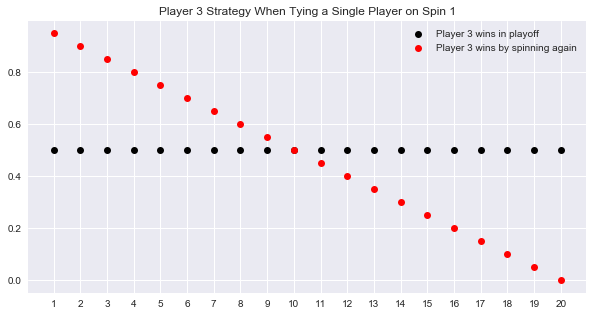

In [55]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(1, 21)

playoff_win = [0.5] * 20
spin_again_win = [(20 - x) / 20 for x in xs]

ax.plot(xs, playoff_win, 'ko', label='Player 3 wins in playoff')
ax.plot(xs, spin_again_win, 'ro', label='Player 3 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 3 Strategy When Tying a Single Player on Spin 1')
plt.legend();

### Two Leaders

If Players 1 and 2 are tied, then Player 3's optimal strategy is a bit different. Now the chances of winning a one-spin playoff are only $\frac{1}{3}$, but the chances of staying under \\$1.00 are still $\frac{20-z}{20}$, where again:

- $z$ is the value of Player 3's first spin (and the leaders' score)

*These* two probabilities are equal when $z=\frac{40}{3}$, and so we have the second result that, if Players 1 and 2 are already tied when Player 3 ties them in one spin, Player 3 should spin again on a score of 65 or less; and stay on a score of 70 or more.

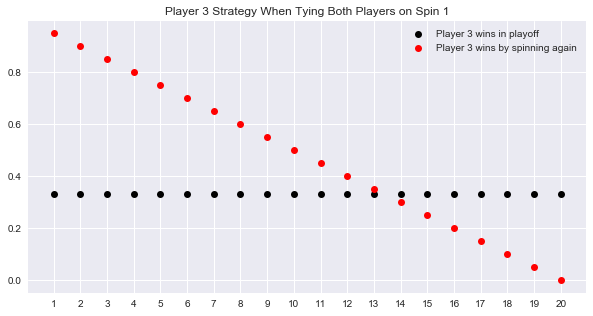

In [56]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(1, 21)

playoff_win = [1/3] * 20
spin_again_win = [(20 - x) / 20 for x in xs]

ax.plot(xs, playoff_win, 'ko', label='Player 3 wins in playoff')
ax.plot(xs, spin_again_win, 'ro', label='Player 3 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 3 Strategy When Tying Both Players on Spin 1')
plt.legend();

This discussion of Player 3's optimal strategy does not consider the benefits of going for \\$1.00 and the bonus prize, and that will be our general assumption moving forward. When analyzing Player 2's optimal strategy, we'll assume that Player 3 will follow the optimal strategy we've just worked out here.

## Player 2's Optimal Strategy

Now we turn to Player 2. Let's first calculate the probability of winning for Player 2 by spinning twice:

First of all, Player 2 has to spin so as not to produce a total greater than \\$1.00, so that's:

$P(not-go-over | spin) = \frac{20-S1}{20}$, where:

- S1 is the value of Player 2's first spin

The next thing that needs to happen is that Player 3 doesn't get a higher score. This could happen either because Player 3 gets less than Player 2's score on two spins or because Player 3 exceeds \\$1.00. There is also a third chance for Player 2 to win, which is that Player 3 ties Player 2 but then loses to Player 2 in a one-spin playoff.

### Player 3 Fails to Surpass Player 2 on Two Spins

Let's work out the chance of the first possibility:

$P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

In [57]:
prob_plyr3_too_small(20)

0.4275

In [58]:
# 18/20 for first spinning $0.05
# 17/20 for first spinning $0.10
# etc.

171/400

0.4275

In [59]:
prob_plyr3_too_small(3)

0.0025

In [60]:
1/400

0.0025

In [61]:
[prob_plyr3_too_small(plyr2) for plyr2 in np.arange(1, 21)]

[0.0,
 0.0,
 0.0025,
 0.0075,
 0.015,
 0.025,
 0.0375,
 0.0525,
 0.07,
 0.09,
 0.1125,
 0.1375,
 0.165,
 0.195,
 0.2275,
 0.2625,
 0.3,
 0.34,
 0.3825,
 0.4275]

### Player 3 Exceeds \\$1.00

Let's now think about the second way in which Player 2 can win: Player 3 going over \\$1.00. We assume here that Player 3's first spin is strictly less than Player 2's score.

$P(P3-exceeds-100 | two-spins) = \frac{1}{20}\Sigma^{P2-1}_{z=1}\frac{z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

In [62]:
prob_plyr3_goes_over(20)

0.475

In [63]:
# 1/20 for first spinning $0.05
# 2/20 for first spinning $0.10
# etc.

190/400

0.475

In [64]:
prob_plyr3_goes_over(1)

0.0

In [65]:
prob_plyr3_goes_over(2)

0.0025

In [66]:
1/400

0.0025

In [67]:
[prob_plyr3_goes_over(plyr2) for plyr2 in np.arange(1, 21)]

[0.0,
 0.0025,
 0.0075,
 0.015,
 0.025,
 0.0375,
 0.0525,
 0.07,
 0.09,
 0.1125,
 0.1375,
 0.165,
 0.195,
 0.2275,
 0.2625,
 0.3,
 0.34,
 0.3825,
 0.4275,
 0.475]

### Player 3 Ties Player 2

The last possibility for Player 2 to win occurs when Player 3 ties Player 2 on one or two spins.

We'll assume that Player 3 follows the optimal strategy worked out above, and so that means that if Player 2's score is \\$0.50 or less, Player 3 will spin again, and otherwise Player 3 will opt for the one-spin playoff.

Where $z$ is the value of Player 3's first spin (and Player 2's score), the probability of Player 2 winning in this way is thus:

- $\left(\frac{1}{20}\right)\left(\frac{z}{20}\right)+\left(\frac{z-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)$ if $z <= 10$
- $\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)+\left(\frac{z-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)$ otherwise

In [68]:
prob_plyr3_ties_then_loses(20)

0.04875

In [69]:
1/40 + 19/800

0.04875

### Putting it All Together

We've now canvassed all the options for Player 2 to win, assuming that Player 1 is not in the picture. We started by assuming that Player 2 would spin again. But notice that our calculations will be much the same if Player 2 decides instead to stay. (But the expectation value of Player 2's score will of course be lower.)

The part that needs working out is getting from Player 2's first spin S1 to Player 2's score P2, i.e. we need to take into account the effect of Player 2's second spin.

Let's start with the idea of Player 3 failing to surpass Player 2 on two spins. Suppose Player 2 first spins \\$0.50. We said above that the probability of Player 2 winning by Player 3 failing to surpass Player 2 on two spins is:

$P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$.

If Player 2 first spins \\$0.50, then there's a 5\% chance that P2 will be \\$0.55, a 5\% chance that P2 will be \\$0.60, etc. And of course there is also a 50\% chance that Player 2 will go over \\$1.00.

In general, in terms of Player 2's two spins S1 and S2, we have:

$P(P3-too-small | first-spin) = \frac{1}{20}\Sigma^{20-S1}_{S2=1}\frac{1}{20}\Sigma^{S1+S2-2}_{z=1}\frac{S1+S2-1-z}{20}$, where:

- z is the value of Player 3's first spin

In [70]:
[plyr3_too_small_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.1425,
 0.1425,
 0.142375,
 0.142,
 0.14125,
 0.14,
 0.138125,
 0.1355,
 0.132,
 0.1275,
 0.121875,
 0.115,
 0.10675,
 0.097,
 0.085625,
 0.0725,
 0.0575,
 0.0405,
 0.021375,
 0.0]

Now let's think about the idea of Player 3 going over \\$1.00.

Similar reasoning to the above leads us to the equation:

$P(P3-exceeds-100 | first-spin) = \frac{1}{20}\Sigma^{20-S1}_{S2=1}\frac{1}{20}\Sigma^{S1+S2-1}_{z=1}\frac{z}{20}$.

In [71]:
[plyr3_goes_over_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.16625,
 0.166125,
 0.16575,
 0.165,
 0.16375,
 0.161875,
 0.15925,
 0.15575,
 0.15125,
 0.145625,
 0.13875,
 0.1305,
 0.12075,
 0.109375,
 0.09625,
 0.08125,
 0.06425,
 0.045125,
 0.02375,
 0.0]

There is the final case of Player 3 tying Player 2 and then losing:

$P(P3-ties-then-loses | first-spin) = \frac{1}{20}\Sigma^{10-S1}_{S2=1}\left[\left(\frac{1}{20}\right)\left(\frac{S1+S2}{20}\right)+\left(\frac{S1+S2-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)\right]+\frac{1}{20}\Sigma^{20-S1}_{S2=11-S1, S2>0}\left[\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)+\left(\frac{S1+S2-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)\right]$.

In order to deal with the starting index for the second sum, we'll take the max of {11-S1, 1}.

In [72]:
[plyr3_ties_then_loses_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.031125,
 0.0308125,
 0.0303125,
 0.029625,
 0.02875,
 0.027687499999999997,
 0.0264375,
 0.025,
 0.023375,
 0.0215625,
 0.0196875,
 0.01775,
 0.01575,
 0.013687499999999998,
 0.0115625,
 0.009375000000000001,
 0.007125,
 0.0048125,
 0.0024375,
 0.0]

In [73]:
plyr2_defeats_plyr3(20, spin_again=False)

0.9512499999999999

In [74]:
plyr2_defeats_plyr3(20, spin_again=True)

0.0

In [75]:
plyr2_defeats_plyr3(10, spin_again=False)

0.23875000000000002

In [76]:
plyr2_defeats_plyr3(10, spin_again=True)

0.2946875

In [77]:
stay = [plyr2_defeats_plyr3(x, spin_again=False) for x in np.arange(1, 21)]

In [78]:
spin_again = [plyr2_defeats_plyr3(x, spin_again=True) for x in np.arange(1, 21)]

In [79]:
probs = list(zip(stay, spin_again))
probs

[(0.0025, 0.339875),
 (0.00875, 0.3394375),
 (0.02, 0.3384375),
 (0.03625, 0.336625),
 (0.0575, 0.33375),
 (0.08374999999999999, 0.3295625),
 (0.11499999999999999, 0.3238125),
 (0.15125, 0.31625000000000003),
 (0.1925, 0.306625),
 (0.23875000000000002, 0.2946875),
 (0.2875, 0.2803125),
 (0.34125, 0.26325),
 (0.39999999999999997, 0.24324999999999997),
 (0.46375, 0.2200625),
 (0.5325, 0.1934375),
 (0.60625, 0.163125),
 (0.685, 0.128875),
 (0.76875, 0.0904375),
 (0.8575, 0.0475625),
 (0.9512499999999999, 0.0)]

In [80]:
player2probsdf = pd.DataFrame(probs,
             columns=['prob_win_if_stay', 'prob_win_if_spin_again'],
            index=np.arange(5, 101, 5))
player2probsdf

,prob_win_if_stay,prob_win_if_spin_again
5,0.00250,0.339875
10,0.00875,0.339438
15,0.02000,0.338438
20,0.03625,0.336625
25,0.05750,0.333750
30,0.08375,0.329562
35,0.11500,0.323813
40,0.15125,0.316250
45,0.19250,0.306625
50,0.23875,0.294687


We can see from this list of probabilities of winning for Player 2 for each strategy that:

- Player 2 should spin again if the first spin is less than 55 cents
- Player 2 should stay if the first spin is greater than or equal to 55 cents
- 55 cents is the worst first spin in the sense that the function `max(P(win| stay), P(win | spin again))` is at its minimum.

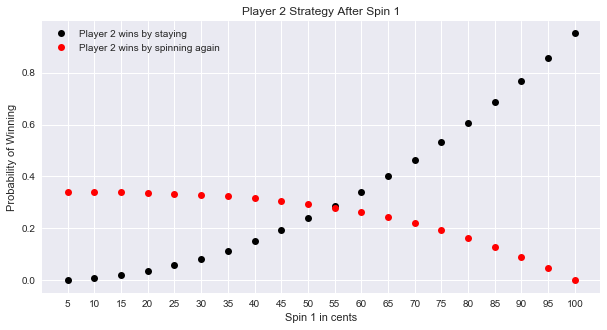

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(5, 101, 5)

stay_win = player2probsdf['prob_win_if_stay']
spin_again_win = player2probsdf['prob_win_if_spin_again']

ax.plot(xs, stay_win, 'ko', label='Player 2 wins by staying')
ax.plot(xs, spin_again_win, 'ro', label='Player 2 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 2 Strategy After Spin 1')
ax.set_xlabel('Spin 1 in cents')
ax.set_ylabel('Probability of Winning')
plt.legend();

## Player 1's Optimal Strategy

We'll prove here that Player 1 should spin again with \\$0.65 but stand on \\$0.70.

As before, we'll simply consider all the possible ways for Player 1 to win.

First, if Player 1 spins a second time, the total will need to be less than or equal to \\$1.00. So once again that's:

$P(not-go-over | spin) = \frac{20-S1}{20}$, where:

- S1 is the value of Player 1's first spin

The rest of the calculation is similar to our calculation for Player 2, except now Player 1 must defeat both Player 2 and Player 3. So Player 1 wins if:

- Players 2 and 3 both have a total under Player 1's total, or
- Player 2's total is under Player 1's and Player 3 exceeds \\$1.00, or
- Player 3's total is under Player 1's and Player 2 exceeds \\$1.00, or
- Players 2 and 3 both exceed \\$1.00.

And there are a number of scenarios involving ties in which Player 1 can win as well. As before we'll save these tying scenarios for the end.

Also as before, we'll start by considering Player 1's total score before expressing ourselves in terms of Player 1's individual spins.

### Players 2 and 3 Fail to Surpass Player 1 on Two Spins

Above we worked out the probability for Player 3 to fail to surpass Player 2 on two spins. That number was:

$P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

So if both Player 2 and Player 3 will fail to surpass Player 1, we'll have:

$P(P2-too-small \& P3-too-small | two-spins) = \left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1-2}_{P3S1=1}\frac{P1-1-P3S1}{20}\right)$, where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

Note in particular that these two events (each of Players 2 and 3 failing to surpass Player 1) are probablistically independent; hence we simply have to multiply them together.

In [82]:
prob_plyr2_and_plyr3_too_small(3)

6.25e-06

In [83]:
1/20**4

6.25e-06

In [84]:
[prob_plyr2_and_plyr3_too_small(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 6.25e-06,
 5.625e-05,
 0.000225,
 0.0006250000000000001,
 0.00140625,
 0.0027562499999999996,
 0.004900000000000001,
 0.0081,
 0.01265625,
 0.018906250000000003,
 0.027225000000000003,
 0.038025,
 0.051756250000000004,
 0.06890625,
 0.09,
 0.11560000000000002,
 0.14630625,
 0.18275624999999998]

### Player 2 Fails to Surpass Player 1 on Two Spins and Player 3 Exceeds \\$1.00

These two events are also probablistically independent. Moreover, with Player 2 out of the picture, the possibilities for Player 3 exceeding \\$1.00 trying to defeat Player 1 are completely analogous to the possibilities we considered above for Player 3 exceeding \\$1.00 trying to defeat Player 2 with Player 1 out of the picture.

Since:

$P(P2-too-small | two-spins) = \frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}$, where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin

and:

$P(P3-exceeds-100 | two-spins) = \frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{P3S1}{20}$, where:

- P1 is Player 1's score
- P3S1 is the value of Player 3's first spin

we have:

$P(P2-too-small\&P3-exceeds-100 | two-spins) = \left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{P3S1}{20}\right)$, where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [85]:
plyr2_too_small_and_plyr3_goes_over(20)

0.20306249999999998

In [86]:
171/400 * 190/400

0.20306249999999998

In [87]:
[plyr2_too_small_and_plyr3_goes_over(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 1.875e-05,
 0.0001125,
 0.000375,
 0.0009375,
 0.00196875,
 0.0036750000000000003,
 0.0063,
 0.010125,
 0.015468750000000002,
 0.022687500000000003,
 0.032175,
 0.044362500000000006,
 0.05971875000000001,
 0.07875,
 0.10200000000000001,
 0.13005,
 0.16351875,
 0.20306249999999998]

### Player 2 Exceeds \\$1.00 and Player 3 Fails to Surpass Player 1

There is a new complication here, which is that Player 2 may exceed \\$1.00 *even when Player 2 has enough to defeat Player 1 on the first spin*. If Player 1 only manages to get, say, \\$0.20 on two spins, and then Player 2 gets \\$0.30 on the first spin, Player 2 should spin again, even though Player 2 risks exceeding \\$1.00 -- and, if that happens, Player 1 could still win!

For the last scenario, where it was Player 2 who failed to surpass Player 1 and Player 3 who exceeded \\$1.00, we calculated:

$P(P2-too-small\&P3-exceeds-100 | two-spins) = \left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{P3S1}{20}\right)$, where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

The adjustment we need to make for our new scenario is to allow that Player 2 may exceed \\$1.00 *without* having a first spin below Player 1's score:

$P(P2-exceeds-100\&P3-too-small | two-spins) = \left(\frac{1}{20}\Sigma^{P1-1}_{P2S1=1}\frac{P2S1}{20}+\frac{1}{20}\Sigma^{10}_{P2S1=P1+1}\frac{P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1-2}_{P3S1=1}\frac{P1-1-P3S1}{20}\right)$

where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [88]:
plyr2_goes_over_and_plyr3_too_small(3)

0.00032500000000000004

In [89]:
[plyr2_goes_over_and_plyr3_too_small(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 0.00032500000000000004,
 0.00095625,
 0.001875,
 0.0030625,
 0.0045,
 0.00616875,
 0.008050000000000002,
 0.010125,
 0.015468750000000002,
 0.022687500000000003,
 0.032175,
 0.044362500000000006,
 0.05971875000000001,
 0.07875,
 0.10200000000000001,
 0.13005,
 0.16351875,
 0.20306249999999998]

### Players 2 and 3 Exceed \\$1.00

This is similar to the above; we have to add in again the possibility of Player 2 exceeding \\$1.00 when the first spin is enough to defeat Player 1:

$P(P2-exceeds-100\&P3-exceeds-100 | two-spins) = \left(\frac{1}{20}\Sigma^{P1-1}_{P2S1=1}\frac{P2S1}{20}+\frac{1}{20}\Sigma^{10}_{P2S1=P1+1}\frac{P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{P3S1}{20}\right)$

where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [90]:
plyr2_and_plyr3_go_over(2)

0.00033125

In [91]:
(1/400 + 52/400) * (1/400)

0.00033125

In [92]:
[plyr2_and_plyr3_go_over(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.00033125,
 0.000975,
 0.0019125,
 0.003125,
 0.00459375,
 0.006299999999999999,
 0.008225,
 0.01035,
 0.01265625,
 0.018906250000000003,
 0.027225000000000003,
 0.038025,
 0.051756250000000004,
 0.06890625,
 0.09,
 0.11560000000000002,
 0.14630625,
 0.18275624999999998,
 0.225625]

### Ties

We have yet to consider the event of a tie. There are several ways in which a tie can happen, and several ways in which Player 1 can still win. Let's enumerate these possibilities:

- Player 2 ties Player 1 on one spin,
    - spins again and exceeds \\$1.00, and then
        - Player 3 fails to surpass Player 1's score on two spins;
        - Player 3 exceeds \\$1.00, by first spinning a value less than *or equal to* Player 1's score;
        - Player 3 ties Player 1 on one or two spins, losing to Player 1 in a one-spin playoff;

    - stays with the tie, and then
        - Player 3 fails to surpass that score on two spins and Player 1 wins the one-spin playoff;
        - Player 3 exceeds \\$1.00, by first spinning a value less than *or equal to* that score and Player 1 wins the one-spin playoff;
        - Player 3 ties both players on one or two spins, losing to Player 1 (along with Player 2) in a one-spin playoff;

- Player 2 ties Player 1 on two spins, and then
    - Player 3 fails to surpass that score on two spins and Player 1 wins the one-spin playoff;
    - Player 3 exceeds \\$1.00, by first spinning a value less than *or equal to* that score and Player 1 wins the one-spin playoff;
    - Player 3 ties both players on one or two spins, losing to Player 1 (along with Player 2) in a one-spin playoff;

- Player 2 fails to surpass Player 1 on two spins, and then
    - Player 3 exceeds \\$1.00, by first tying Player 1 and then spinning again;
    - Player 3 ties Player 1 on one or two spins, losing to Player 1 in a one-spin playoff;

- Player 2 exceeds \\$1.00, and then
    - Player 3 exceeds \\$1.00, by first tying Player 1 and then spinning again;
    - Player 3 ties Player 1 on one or two spins, losing to Player 1 in a one-spin playoff.

#### Tying  Scenarios

1. Player 2 ties Player 1 on one spin, spins again and exceeds \\$1.00, and then Player 3 fails to surpass Player 1's score on two spins:

This first scenario invites us to think about Player 2's optimal strategy in the event of tying Player 1 on the first spin.

#### Quick Digression: Player 2's Optimal Strategy When Tying Player 1 on the First Spin

If Player 2 **stays** on the value tied with Player 1, Player 2 will win if:

(Player 3 fails to surpass that value on two spins OR Player 3 exceeds \\$1.00 OR Player 3 ties Players 1 and 2) AND Player 2 wins the one-spin playoff. So we have:

$\frac{1}{20}\left[\frac{1}{2}\left(\frac{1}{20}\Sigma^{P12-2}_{P3S1=1}\frac{P12-1-P3S1}{20}+\frac{1}{20}\Sigma^{P12}_{P3S1=1}\frac{P3S1}{20}\right) + \frac{1}{3}\frac{P12-1}{20}\frac{1}{20}\right], P12\leq\$0.65$;

$\frac{1}{20}\left[\frac{1}{2}\left(\frac{1}{20}\Sigma^{P12-2}_{P3S1=1}\frac{P12-1-P3S1}{20}+\frac{1}{20}\Sigma^{P12-1}_{P3S1=1}\frac{P3S1}{20}\right) + \frac{1}{3}\left(\frac{P12-1}{20}\frac{1}{20} + \frac{1}{20}\right)\right], P12>\$0.65$

where:

- P12 is the score that Players 1 and 2 have
- P3S1 is the value of Player 3's first spin

This formula takes into account Player 3's optimal strategy of spinning again when tying Players 1 and 2 on a score of \\$0.65 or less and otherwise staying put.

In [97]:
plyr2_ties_plyr1_stays_then_wins(20)

0.0241875

In [98]:
plyr2_ties_plyr1_stays_then_wins(10)

0.0060625

Now we construct the probability that Player 2 wins by **spinning again** after tying Player 1 on the first spin. In that case, Player 2 will win if:

Player 2 does not exceed \\$1.00 AND (Player 3 fails to surpass that value on two spins OR Player 3 exceeds \\$1.00 OR Player 3 ties Player 2 and then loses to Player 2 either by spinning again and exceeding \\$1.00 or by getting the lower score in a one-spin playoff). So we have:

$\frac{1}{20}\frac{1}{20}\Sigma^{20-P12}_{P2S2=1}\left(\frac{1}{20}\Sigma^{P12+P2S2-2}_{P3S1=1}\frac{P12+P2S2-1-P3S1}{20}+\frac{1}{20}\Sigma^{P12+P2S2-1}_{P3S1=1}\frac{P3S1}{20}+\frac{1}{2}\frac{P12+P2S2-1}{20}\frac{1}{20}+\frac{1}{2}\frac{1}{20}\frac{P12+P2S2}{20}\right), P12+P2S2\leq\$0.50;$ <br/>
$\frac{1}{20}\frac{1}{20}\Sigma^{20-P12}_{P2S2=1}\left(\frac{1}{20}\Sigma^{P12+P2S2-2}_{P3S1=1}\frac{P12+P2S2-1-P3S1}{20}+\frac{1}{20}\Sigma^{P12+P2S2-1}_{P3S1=1}\frac{P3S1}{20}+\frac{1}{2}\frac{P12+P2S2-1}{20}\frac{1}{20}+\frac{1}{2}\frac{1}{20}\right), P12+P2S2>\$0.50$

where:

- P12 is the score that Players 1 and 2 have
- P2S2 is the value of Player 2's second spin
- P3S1 is the value of Player 3's first spin

This formula takes into account Player 3's optimal strategy of spinning again when tying Player 2 on a score of \\$0.50 or less and otherwise staying put.

In [132]:
plyr2_ties_plyr1_spins_again_then_wins(19)

0.002378125

In [134]:
1/400 * (171/400 + 190/400 + 19/800 + 1/40)

0.002378125

In [135]:
stays = [plyr2_ties_plyr1_stays_then_wins(plyr1) for plyr1 in np.arange(1, 21)]
spins_again = [plyr2_ties_plyr1_spins_again_then_wins(plyr1) for plyr1 in np.arange(1, 21)]

In [136]:
probs = list(zip(stays, spins_again))

In [137]:
player2probsdf = pd.DataFrame(probs,
             columns=['prob_win_if_stay', 'prob_win_if_spin_again'],
            index=np.arange(5, 101, 5))
player2probsdf

,prob_win_if_stay,prob_win_if_spin_again
5,0.000063,0.016825
10,0.000229,0.016809
15,0.000521,0.016769
20,0.000937,0.016691
25,0.001479,0.016563
30,0.002146,0.016372
35,0.002938,0.016106
40,0.003854,0.015753
45,0.004896,0.015300
50,0.006063,0.014734


We can see from this list of probabilities of winning for Player 2 for each strategy that:

- Player 2 should spin again if the first spin is less than 70 cents
- Player 2 should stay if the first spin is greater than or equal to 70 cents
- 70 cents is the worst spin on which to tie Player 1 in the sense that the function `max(P(win| stay), P(win | spin again))` is at its minimum.

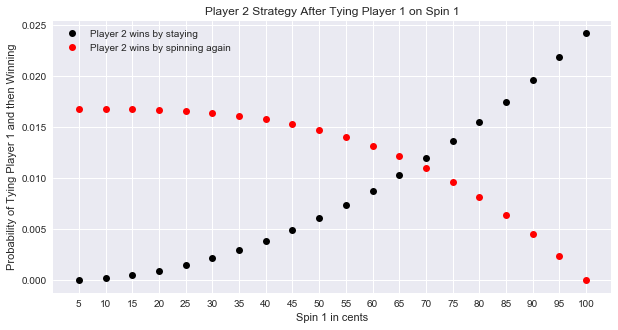

In [142]:
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(5, 101, 5)

stay_win = player2probsdf['prob_win_if_stay']
spin_again_win = player2probsdf['prob_win_if_spin_again']

ax.plot(xs, stay_win, 'ko', label='Player 2 wins by staying')
ax.plot(xs, spin_again_win, 'ro', label='Player 2 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 2 Strategy After Tying Player 1 on Spin 1')
ax.set_xlabel('Spin 1 in cents')
ax.set_ylabel('Probability of Tying Player 1 and then Winning')
plt.legend();

We can now complete our description of Player 2's Optimal Strategy:

**Player 2 Strategy**:
- If you spin more than Player 1 on Spin 1:
    - Spin again with 50 cents or less
    - Stay with more than 50 cents
- If you only tie Player 1 on Spin 1:
    - Spin again with 65 cents or less
    - Stay with more than 65 cents

#### Back to Our Tying Scenarios

Our first tying scenario again was:

1. Player 2 ties Player 1 on one spin, spins again and exceeds \\$1.00, and then Player 3 fails to surpass Player 1's score on two spins.

Let's write out the formula for this, taking into account the optimal strategy for Player 2 just worked out:


$\frac{1}{20}\frac{P1}{20}\frac{1}{20}\Sigma^{P1-2}_{P3S1=1}\frac{P1-1-P3S1}{20}$, where:

- P1 is Player 1's score (less than or eqal to 65 cents)
- P3S1 is the value of Player 3's first spin

In [184]:
plyr2_ties_then_exceeds_plyr3_too_small(10)

0.00225

In [185]:
[plyr2_ties_then_exceeds_plyr3_too_small(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 1.875e-05,
 7.5e-05,
 0.0001875,
 0.000375,
 0.00065625,
 0.00105,
 0.001575,
 0.00225,
 0.00309375,
 0.004125,
 0.0053625,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Let's go through the rest of our tying scenarios:

2. Player 2 ties Player 1 on one spin, spins again and exceeds \\$1.00, and then Player 3 also exceeds \\$1.00, perhaps after tying Player 1 on the first spin.

$\frac{1}{20}\frac{P1}{20}\frac{1}{20}\Sigma^{P1}_{P3S1=1}\frac{P3S1}{20}, P1 <= \$0.50;$ <br/>
$\frac{1}{20}\frac{P1}{20}\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{P3S1}{20}, \$0.50 < P1 < \$0.70$,

where:

- P1 is Player 1's score (less than or equal to 50 cents)
- P3S1 is the value of Player 3's first spin

In [186]:
plyr2_ties_then_exceeds_plyr3_exceeds(10)

0.0034375000000000005

In [187]:
[plyr2_ties_then_exceeds_plyr3_exceeds(plyr1) for plyr1 in np.arange(1, 21)]

[6.25e-06,
 3.75e-05,
 0.0001125,
 0.00025,
 0.00046875,
 0.0007874999999999999,
 0.0012250000000000002,
 0.0018,
 0.00253125,
 0.0034375000000000005,
 0.0037812500000000003,
 0.00495,
 0.0063375,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

3. Player 2 ties Player 1 on one spin, spins again and exceeds \\$1.00, and then Player 3 ties Player 1 on one or two spins, losing to Player 1 in a one-spin playoff.

$\frac{1}{20}\frac{P1}{20}\frac{1}{2}\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{1}{20}, P1 <= \$0.50;$  <br/>
$\frac{1}{20}\frac{P1}{20}\left(\frac{1}{2}\frac{1}{20}+\frac{1}{2}\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{1}{20}\right), \$0.50 < P1 < \$0.70$,

where:

- P1 is Player 1's score (less than or equal to 50 cents)
- P3S1 is the value of Player 3's first spin

In [172]:
plyr2_ties_then_exceeds_plyr3_ties_then_loses(10)

0.00028125

In [188]:
[plyr2_ties_then_exceeds_plyr3_ties_then_loses(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 6.25e-06,
 1.875e-05,
 3.75e-05,
 6.25e-05,
 9.375e-05,
 0.00013125000000000002,
 0.00017500000000000003,
 0.000225,
 0.00028125,
 0.0010312500000000003,
 0.0011625,
 0.0013000000000000002,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

4. Player 2 ties Player 1 on one spin, stays with the tie, and then Player 3 fails to surpass that score on two spins and Player 1 wins the one-spin playoff.

$\frac{1}{20}\frac{1}{2}\frac{1}{20}\Sigma^{P12-2}_{P3S1=1}\frac{P12-1-P3S1}{20}, P12 >= \$0.70$,

where:

- P12 is the score of Players 1 and 2
- P3S1 is the value of Player 3's first spin

In [191]:
plyr2_ties_then_loses_plyr3_too_small(19)

0.0095625

In [192]:
[plyr2_ties_then_loses_plyr3_too_small(plyr1) for plyr1 in np.arange(1, 21)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.004875,
 0.0056875,
 0.0065625,
 0.0075,
 0.0085,
 0.0095625,
 0.0106875]

5. Player 2 ties Player 1 on one spin, stays with the tie, and then Player 3 exceeds \\$1.00, by first spinning a value less than *or equal to* that score and Player 1 wins the one-spin playoff.

Note: Player 2 won't (shouldn't) stay with the tie unless the score is at least \\$0.70, but also Player 3 won't (shouldn't) spin again after tying if the score is at least \\$0.70. Hence in our consideration of optimal strategies we don't need to worry about the possibility of Player 2 tying Player 1 on one spin, Player 3 tying both Players 1 and 2 on one spin, and then spinning again.

$\frac{1}{20}\frac{1}{2}\frac{1}{20}\Sigma^{P12-1}_{P3S1=1}\frac{P3S1}{20}, P12 >= \$0.70$,

where:

- P12 is the score of Players 1 and 2
- P3S1 is the value of Player 3's first spin

In [193]:
plyr2_ties_then_loses_plyr3_exceeds(14)

0.0056875

In [194]:
[plyr2_ties_then_loses_plyr3_exceeds(plyr1) for plyr1 in np.arange(1, 21)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0056875,
 0.0065625,
 0.0075,
 0.0085,
 0.0095625,
 0.0106875,
 0.011875]

6. Player 2 ties Player 1 on one spin, stays with the tie, and then Player 3 ties both players on one or two spins, losing to Player 1 (along with Player 2) in a one-spin playoff.

$\frac{1}{20}\frac{1}{3}\left(\frac{1}{20} + \frac{1}{20}\Sigma^{P12-1}_{P3S1=1}\frac{1}{20}\right), P12 >= \$0.70$,

where:

- P12 is the score of Players 1 and 2
- P3S1 is the value of Player 3's first spin

In [196]:
plyr2_ties_then_loses_plyr3_ties_then_loses(19)

0.0015833333333333333

In [197]:
[plyr2_ties_then_loses_plyr3_ties_then_loses(plyr1) for plyr1 in np.arange(1, 21)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0013750000000000001,
 0.0014166666666666668,
 0.0014583333333333332,
 0.0015,
 0.0015416666666666667,
 0.0015833333333333333,
 0.001625]

7. Player 2 ties Player 1 on two spins, and then Player 3 fails to surpass that score on two spins and Player 1 wins the one-spin playoff.

$\left(\frac{1}{20}\Sigma^{P12-1}_{P2S1=1}\frac{1}{20}\right)\frac{1}{2}\frac{1}{20}\Sigma^{P12-2}_{P3S1=1}\frac{P12-1-P3S1}{20}$,

where:

- P12 is the score of Players 1 and 2
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [200]:
plyr2_ties_on2_then_loses_plyr3_too_small(1)

0.0

In [201]:
[plyr2_ties_on2_then_loses_plyr3_too_small(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 6.25e-06,
 2.8125e-05,
 7.5e-05,
 0.00015625000000000003,
 0.00028125,
 0.00045937500000000004,
 0.0007000000000000001,
 0.0010125,
 0.0014062500000000002,
 0.0018906250000000002,
 0.002475,
 0.00316875,
 0.00398125,
 0.004921875,
 0.006,
 0.007225000000000001,
 0.00860625,
 0.010153125]

8. Player 2 ties Player 1 on two spins, and then Player 3 exceeds \\$1.00, by first spinning a value less than *or equal to* that score and Player 1 wins the one-spin playoff.

$\left(\frac{1}{20}\Sigma^{P12-1}_{P2S1=1}\frac{1}{20}\right)\frac{1}{20}\Sigma^{P12}_{P3S1=1}\frac{P3S1}{20}, P12 < \$0.70;$ <br/>
$\left(\frac{1}{20}\Sigma^{P12-1}_{P2S1=1}\frac{1}{20}\right)\frac{1}{20}\Sigma^{P12-1}_{P3S1=1}\frac{P3S1}{20}, P12\geq\$0.70$,

where:

- P12 is the score of Players 1 and 2
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [203]:
plyr2_ties_on2_then_loses_plyr3_exceeds(20)

0.0225625

In [204]:
[plyr2_ties_on2_then_loses_plyr3_exceeds(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 1.875e-05,
 7.5e-05,
 0.0001875,
 0.000375,
 0.00065625,
 0.0010500000000000002,
 0.001575,
 0.0022500000000000003,
 0.00309375,
 0.004125,
 0.0053625,
 0.00585,
 0.00739375,
 0.009187500000000001,
 0.01125,
 0.013600000000000001,
 0.01625625,
 0.019237499999999998,
 0.0225625]

9. Player 2 ties Player 1 on two spins, and then Player 3 ties both players on one or two spins, losing to Player 1 (along with Player 2) in a one-spin playoff.

$\left(\frac{1}{20}\Sigma^{P12-1}_{P2S1=1}\frac{1}{20}\right)\frac{1}{3}\frac{1}{20}\Sigma^{P12-1}_{P3S1=1}\frac{1}{20}, P12 < \$0.70;$ <br/>
$\left(\frac{1}{20}\Sigma^{P12-1}_{P2S1=1}\frac{1}{20}\right)\frac{1}{3}\left(\frac{1}{20} + \frac{1}{20}\Sigma^{P12-1}_{P3S1=1}\frac{1}{20}\right), P12\geq\$0.70$,

where:

- P12 is the score of Players 1 and 2
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [207]:
plyr2_ties_on2_then_loses_plyr3_ties_then_loses(19)

0.0014249999999999998

In [208]:
[plyr2_ties_on2_then_loses_plyr3_ties_then_loses(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 2.0833333333333334e-06,
 8.333333333333334e-06,
 1.875e-05,
 3.3333333333333335e-05,
 5.208333333333334e-05,
 7.5e-05,
 0.00010208333333333335,
 0.00013333333333333334,
 0.00016874999999999998,
 0.00020833333333333335,
 0.0002520833333333333,
 0.0007999999999999999,
 0.00089375,
 0.0009916666666666667,
 0.0010937499999999999,
 0.0012,
 0.0013104166666666665,
 0.0014249999999999998,
 0.00154375]

10. Player 2 fails to surpass Player 1 on two spins, and then Player 3 exceeds \\$1.00, by first tying Player 1 and then spinning again.

$\left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\left(\frac{1}{20}\frac{P1}{20}\right), P1\leq\$0.50$,

where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin

In [213]:
plyr2_too_small_plyr3_ties_then_exceeds(10)

0.00225

In [215]:
36 / 400 * 1 / 40

0.00225

In [216]:
[plyr2_too_small_plyr3_ties_then_exceeds(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 1.875e-05,
 7.5e-05,
 0.0001875,
 0.000375,
 0.00065625,
 0.00105,
 0.001575,
 0.00225,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

11. Player 2 fails to surpass Player 1 on two spins, and then Player 3 ties Player 1 on one or two spins, losing to Player 1 in a one-spin playoff.

$\left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\frac{1}{2}\left(\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{1}{20}\right), P1\leq\$0.50$;
<br/>
$\left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\frac{1}{2}\left(\frac{1}{20} + \frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{1}{20}\right), P1 > \$0.50$,

where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [218]:
plyr2_too_small_plyr3_ties_then_loses(20)

0.020840625

In [221]:
171/400 * (1/20 + 19/400) / 2

0.020840625

In [222]:
[plyr2_too_small_plyr3_ties_then_loses(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 6.25e-06,
 2.8125e-05,
 7.5e-05,
 0.00015625000000000003,
 0.00028125,
 0.00045937500000000004,
 0.0007000000000000001,
 0.0010125,
 0.004218750000000001,
 0.005328125,
 0.006600000000000001,
 0.00804375,
 0.00966875,
 0.011484375,
 0.0135,
 0.015725,
 0.01816875,
 0.020840625]

12. Player 2 exceeds \\$1.00, and then Player 3 exceeds \\$1.00, by first tying Player 1 and then spinning again.

$\left(\frac{1}{20}\left(\Sigma^{P1-1}_{P2S1=1}\frac{P2S1}{20}+\Sigma^{10}_{P2S1=P1+1}\frac{P2S1}{20}\right)\right)\left(\frac{1}{20}\frac{P1}{20}\right), P1\leq\$0.50$,

where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin

In [235]:
plyr2_exceeds_plyr3_ties_then_exceeds(10)

0.0028125000000000003

In [237]:
45/400 * 1/40

0.0028125

In [238]:
[plyr2_exceeds_plyr3_ties_then_exceeds(plyr1) for plyr1 in np.arange(1, 21)]

[0.0003375,
 0.0006625,
 0.000975,
 0.001275,
 0.0015625,
 0.0018375,
 0.0021000000000000003,
 0.00235,
 0.0025874999999999995,
 0.0028125000000000003,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

13. Player 2 exceeds \\$1.00, and then Player 3 ties Player 1 on one or two spins, losing to Player 1 in a one-spin playoff.

$\left(\frac{1}{20}\left(\Sigma^{P1-1}_{P2S1=1}\frac{P2S1}{20}+\Sigma^{10}_{P2S1=P1+1}\frac{P2S1}{20}\right)\right)\frac{1}{2}\left(\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{1}{20}\right), P1\leq\$0.50;$ <br/>
$\left(\frac{1}{20}\left(\Sigma^{P1-1}_{P2S1=1}\frac{P2S1}{20}+\Sigma^{10}_{P2S1=P1+1}\frac{P2S1}{20}\right)\right)\frac{1}{2}\left(\frac{1}{20}+\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{1}{20}\right), P1>\$0.50$,

where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

In [243]:
plyr2_exceeds_plyr3_ties_then_loses(20)

0.02315625

In [245]:
190/400 * (1/40 + 19/800)

0.02315625

In [246]:
[plyr2_exceeds_plyr3_ties_then_loses(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.000165625,
 0.00032500000000000004,
 0.000478125,
 0.000625,
 0.000765625,
 0.0009,
 0.0010281250000000002,
 0.00115,
 0.001265625,
 0.005156250000000001,
 0.00639375,
 0.0078000000000000005,
 0.009384375,
 0.011156250000000001,
 0.013125,
 0.015300000000000001,
 0.017690625,
 0.02030625,
 0.02315625]

### Putting It All Together for Player 1

We've now gone through all the scenarios by which Player 1 can win. We now need simply to put our results in terms of the one or two spins of Player 1 and then add everything up. At this point I'll suppress the explanations of the variables; the nomenclature should be clear by now.

**Case 1**: Player 2 and Player 3 both fail to exceed Player 1's total.

In terms of Player 1's first spin, we have:

$P(P2-too-small \& P3-too-small | first-spin) = \frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\left(\frac{1}{20}\Sigma^{P1S1+P1S2-2}_{P2S1=1}\frac{P1S1+P1S2-1-P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1S1+P1S2-2}_{P3S1=1}\frac{P1S1+P1S2-1-P3S1}{20}\right)$

In [250]:
plyr2_and_plyr3_too_small_given_first_spin_plyr1(1)

0.038510625

In [252]:
[plyr2_and_plyr3_too_small_given_first_spin_plyr1(spin1) for spin1 in np.arange(1, 21)]

[0.038510625,
 0.038510625,
 0.0385103125,
 0.0385075,
 0.03849625,
 0.038465,
 0.0383946875,
 0.038256875,
 0.038011875,
 0.037606875,
 0.0369740625,
 0.03602875,
 0.0346675,
 0.03276625,
 0.0301784375,
 0.026733125,
 0.022233125,
 0.016453125,
 0.0091378125,
 0.0]

**Case 2**: Player 2 fails to exceed Player 1's total and Player 3 goes over \$1.00 (without first tying Player 1).

In terms of Player 1's first spin, we have:

$P(P2-too-small\&P3-exceeds-100 | first-spin) = \frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\left(\frac{1}{20}\Sigma^{P1S1+P1S2-2}_{P2S1=1}\frac{P1S1+P1S2-1-P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1S1+P1S2-1}_{P3S1=1}\frac{P3S1}{20}\right)$

In [5]:
plyr2_too_small_and_plyr3_goes_over_given_first_spin_plyr1(1)

0.0437653125

In [6]:
[plyr2_too_small_and_plyr3_goes_over_given_first_spin_plyr1(spin1)\
    for spin1 in np.arange(1, 21)]

[0.0437653125,
 0.0437653125,
 0.043764375,
 0.04375875,
 0.04374,
 0.043693125,
 0.0435946875,
 0.0434109375,
 0.0430959375,
 0.0425896875,
 0.04181625,
 0.040681875,
 0.039073125,
 0.036855,
 0.0338690625,
 0.0299315625,
 0.0248315625,
 0.0183290625,
 0.010153125,
 0.0]

**Case 3**: Player 2 goes over \$1.00 (without first tying Player 1) and Player 3 fails to exceed Player 1's total.

In terms of Player 1's first spin, we have:

$P(P2-exceeds-100\&P3-too-small | first-spin) = \frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\left(\frac{1}{20}\Sigma^{P1S1+P1S2-1}_{P2S1=1}\frac{P2S1}{20}+\frac{1}{20}\Sigma^{10}_{P2S1=P1+P2+1}\frac{P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1S1+P1S2-2}_{P3S1=1}\frac{P1S1+P1S2-1-P3S1}{20}\right)$

In [8]:
plyr2_goes_over_and_plyr3_too_small_given_first_spin_plyr1(1)

0.0443428125

In [9]:
[plyr2_goes_over_and_plyr3_too_small_given_first_spin_plyr1(spin1)
     for spin1 in np.arange(1, 21)]

[0.0443428125,
 0.0443428125,
 0.0443265625,
 0.04427875,
 0.044185,
 0.044031875,
 0.043806875,
 0.0434984375,
 0.0430959375,
 0.0425896875,
 0.04181625,
 0.040681875,
 0.039073125,
 0.036855,
 0.0338690625,
 0.0299315625,
 0.0248315625,
 0.0183290625,
 0.010153125,
 0.0]

**Case 4**: Players 2 and 3 both exceed \$1.00 (without either first tying Player 1).

In terms of Player 1's first spin, we have:

$P(P2-exceeds-100\&P3-exceeds-100 | first-spin) = \frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\left(\frac{1}{20}\Sigma^{P1S1+P1S2-1}_{P2S1=1}\frac{P2S1}{20}+\frac{1}{20}\Sigma^{10}_{P2S1=P1S1+P1S2+1}\frac{P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1S1+P1S2-1}_{P3S1=1}\frac{P3S1}{20}\right)$

In [13]:
plyr2_and_plyr3_go_over_given_first_spin_plyr1(1)

0.05067875

In [14]:
[plyr2_and_plyr3_go_over_given_first_spin_plyr1(spin1)\
     for spin1 in np.arange(1, 21)]

[0.05067875,
 0.0506621875,
 0.0506134375,
 0.0505178125,
 0.0503615625,
 0.050131875,
 0.049816875,
 0.049405625,
 0.048888125,
 0.0482553125,
 0.04731,
 0.04594875,
 0.0440475,
 0.0414596875,
 0.038014375,
 0.033514375,
 0.027734375,
 0.0204190625,
 0.01128125,
 0.0]

**Case 5**: Player 2 ties Player 1 on one spin, spins again and exceeds \\$1.00, and then Player 3 fails to surpass Player 1's score on two spins.

In terms of Player 1's first spin, we have:

$\frac{1}{20}\Sigma^{13-P1S1}_{P1S2=1}\frac{1}{20}\frac{P1S1+P1S2}{20}\frac{1}{20}\Sigma^{P1S1+P1S2-2}_{P3S1=1}\frac{P1S1+P1S2-1-P3S1}{20}$

In [18]:
plyr2_ties_then_exceeds_plyr3_too_small_given_first_spin_plyr1(1)

0.0009384375

In [19]:
[plyr2_ties_then_exceeds_plyr3_too_small_given_first_spin_plyr1(spin1)\
    for spin1 in np.arange(1, 21)]

[0.0009384375,
 0.0009384375,
 0.0009375,
 0.00093375,
 0.000924375,
 0.000905625,
 0.0008728125,
 0.0008203125,
 0.0007415625,
 0.0006290625,
 0.000474375,
 0.000268125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

**Case 6**: Player 2 ties Player 1 on one spin, spins again and exceeds \\$1.00, and then Player 3 also exceeds \\$1.00, perhaps after tying Player 1 on the first spin.

In terms of Player 1's first spin, we have:

$\frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\frac{1}{20}\frac{P1S1+P1S2}{20}\frac{1}{20}\Sigma^{P1S1+P1S2}_{P3S1=1}\frac{P3S1}{20}, P1S1+P1S2 <= \$0.50;$ <br/>
$\frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\frac{1}{20}\frac{P1S1+P1S2}{20}\frac{1}{20}\Sigma^{P1S1+P1S2-1}_{P3S1=1}\frac{P3S1}{20}, \$0.50 < P1S1+P1S2 < \$0.70$

In [23]:
plyr2_ties_then_exceeds_plyr3_exceeds_given_first_spin_plyr1(1)

0.0009690625

In [24]:
[plyr2_ties_then_exceeds_plyr3_exceeds_given_first_spin_plyr1(spin1)\
    for spin1 in np.arange(1, 21)]

[0.0009690625,
 0.0009671875,
 0.0009615625,
 0.0009490625,
 0.000925625,
 0.00088625,
 0.000825,
 0.000735,
 0.0006084375,
 0.0004365625,
 0.0002475,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

**Case 7**: Player 2 ties Player 1 on one spin, spins again and exceeds \\$1.00, and then Player 3 ties Player 1 on one or two spins, losing to Player 1 in a one-spin playoff.

In terms of Player 1's first spin, we have:

$\frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\frac{1}{20}\frac{P1S1+P1S2}{20}\frac{1}{2}\frac{1}{20}\Sigma^{P1S1+P1S2-1}_{P3S1=1}\frac{1}{20}, P1S1+P1S2 <= \$0.50;$  <br/>
$\frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\frac{1}{20}\frac{P1S1+P1S2}{20}\left(\frac{1}{2}\frac{1}{20}+\frac{1}{2}\frac{1}{20}\Sigma^{P1S1+P1S2-1}_{P3S1=1}\frac{1}{20}\right), \$0.50 < P1S1+P1S2 < \$0.70$

In [29]:
plyr2_ties_then_exceeds_plyr3_ties_then_loses_given_first_spin_plyr1(1)

0.00022625000000000002

In [30]:
[plyr2_ties_then_exceeds_plyr3_ties_then_loses_given_first_spin_plyr1(spin1)\
    for spin1 in np.arange(1, 21)]

[0.00022625000000000002,
 0.00022593749999999998,
 0.000225,
 0.00022312500000000002,
 0.00022,
 0.0002153125,
 0.00020874999999999998,
 0.0002,
 0.00018875,
 0.0001746875,
 0.00012312500000000002,
 6.500000000000001e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

**Case 8**: Player 2 ties Player 1 on one spin, stays with the tie, and then Player 3 fails to surpass that score on two spins and Player 1 wins the one-spin playoff.

In terms of Player 1's first spin, we have:

$\frac{1}{20}\Sigma^{20-P1S1}_{P1S2=1}\frac{1}{20}\frac{1}{2}\frac{1}{20}\Sigma^{P1S1+P1S2-2}_{P3S1=1}\frac{P1S1+P1S2-1-P3S1}{20}, P1S1+P1S2 >= \$0.70$

In [34]:
plyr2_ties_then_loses_plyr3_too_small_given_first_spin_plyr1(19)

0.000534375

In [37]:
1/20 * 1/20 * 1/2 * 171/400

0.000534375

In [38]:
[plyr2_ties_then_loses_plyr3_too_small_given_first_spin_plyr1(spin1)\
     for spin1 in np.arange(1, 21)]

[0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.00266875,
 0.002425,
 0.002140625,
 0.0018125,
 0.0014375,
 0.0010125,
 0.000534375,
 0.0]

In [ ]:
def plyr2_defeats_plyr3(plyr2, spin_again=True):
    """This function returns the probability that Player 2
    defeats Player 3, given the value of Player 2's first
    spin as input. This function assumes that Player 1 is
    out of the picture (either because of exceeding $1.00
    or by having a total less than Player 2's first spin."""
    
    import numpy as np
    prob = 1
    if spin_again:
        plyr3_too_small = plyr3_too_small_given_first_spin_plyr2(plyr2)
        plyr3_goes_over = plyr3_goes_over_given_first_spin_plyr2(plyr2)
        plyr3_ties_then_loses = plyr3_ties_then_loses_given_first_spin_plyr2(plyr2)
    
    else:
        plyr3_too_small = prob_plyr3_too_small(plyr2)
        plyr3_goes_over = prob_plyr3_goes_over(plyr2)
        plyr3_ties_then_loses = prob_plyr3_ties_then_loses(plyr2)
    
    prob *= (plyr3_too_small + plyr3_goes_over + plyr3_ties_then_loses)
    
    return prob